In [6]:
import numpy as np
from PIL import Image
import os
import json
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [2]:
# Paths
images_dir = "images"
labels_dir = "labels"

def center_crop_and_resize(image_path, target_size=(224, 224)):
    """
    Crops the center square of an image and resizes it to the target size.

    Args:
        image_path (str): Path to the input image.
        target_size (tuple): Target size for resizing (width, height).

    Returns:
        PIL.Image.Image: The cropped and resized image.
    """

    image = Image.open(image_path)
    width, height = image.size

    # Calculate the cropping box for a center square
    min_dim = min(width, height)
    left = (width - min_dim) // 2
    top = (height - min_dim) // 2
    right = left + min_dim
    bottom = top + min_dim

    # Crop the center square
    image = image.crop((left, top, right, bottom))

    # Resize to the target size
    image = image.resize(target_size, Image.Resampling.LANCZOS)

    return image

# Load dataset
def load_dataset(images_dir, labels_dir):
    images = []
    labels = []
    for image_file in os.listdir(images_dir):
        if image_file.endswith(".jpg"):
            image_path = os.path.join(images_dir, image_file)
            label_path = os.path.join(labels_dir, image_file.replace(".jpg", ".json"))

            # Load and preprocess image
            image = center_crop_and_resize(image_path)  # Resize for ResNet50
            images.append(np.array(image) / 255.0)  # Normalize to [0, 1]

            # Load label
            with open(label_path, 'r') as f:
                label = json.load(f)
                labels.append([label["red_count"], label["green_count"], label["blue_count"]])

    return np.array(images), np.array(labels)

images, labels = load_dataset(images_dir, labels_dir)

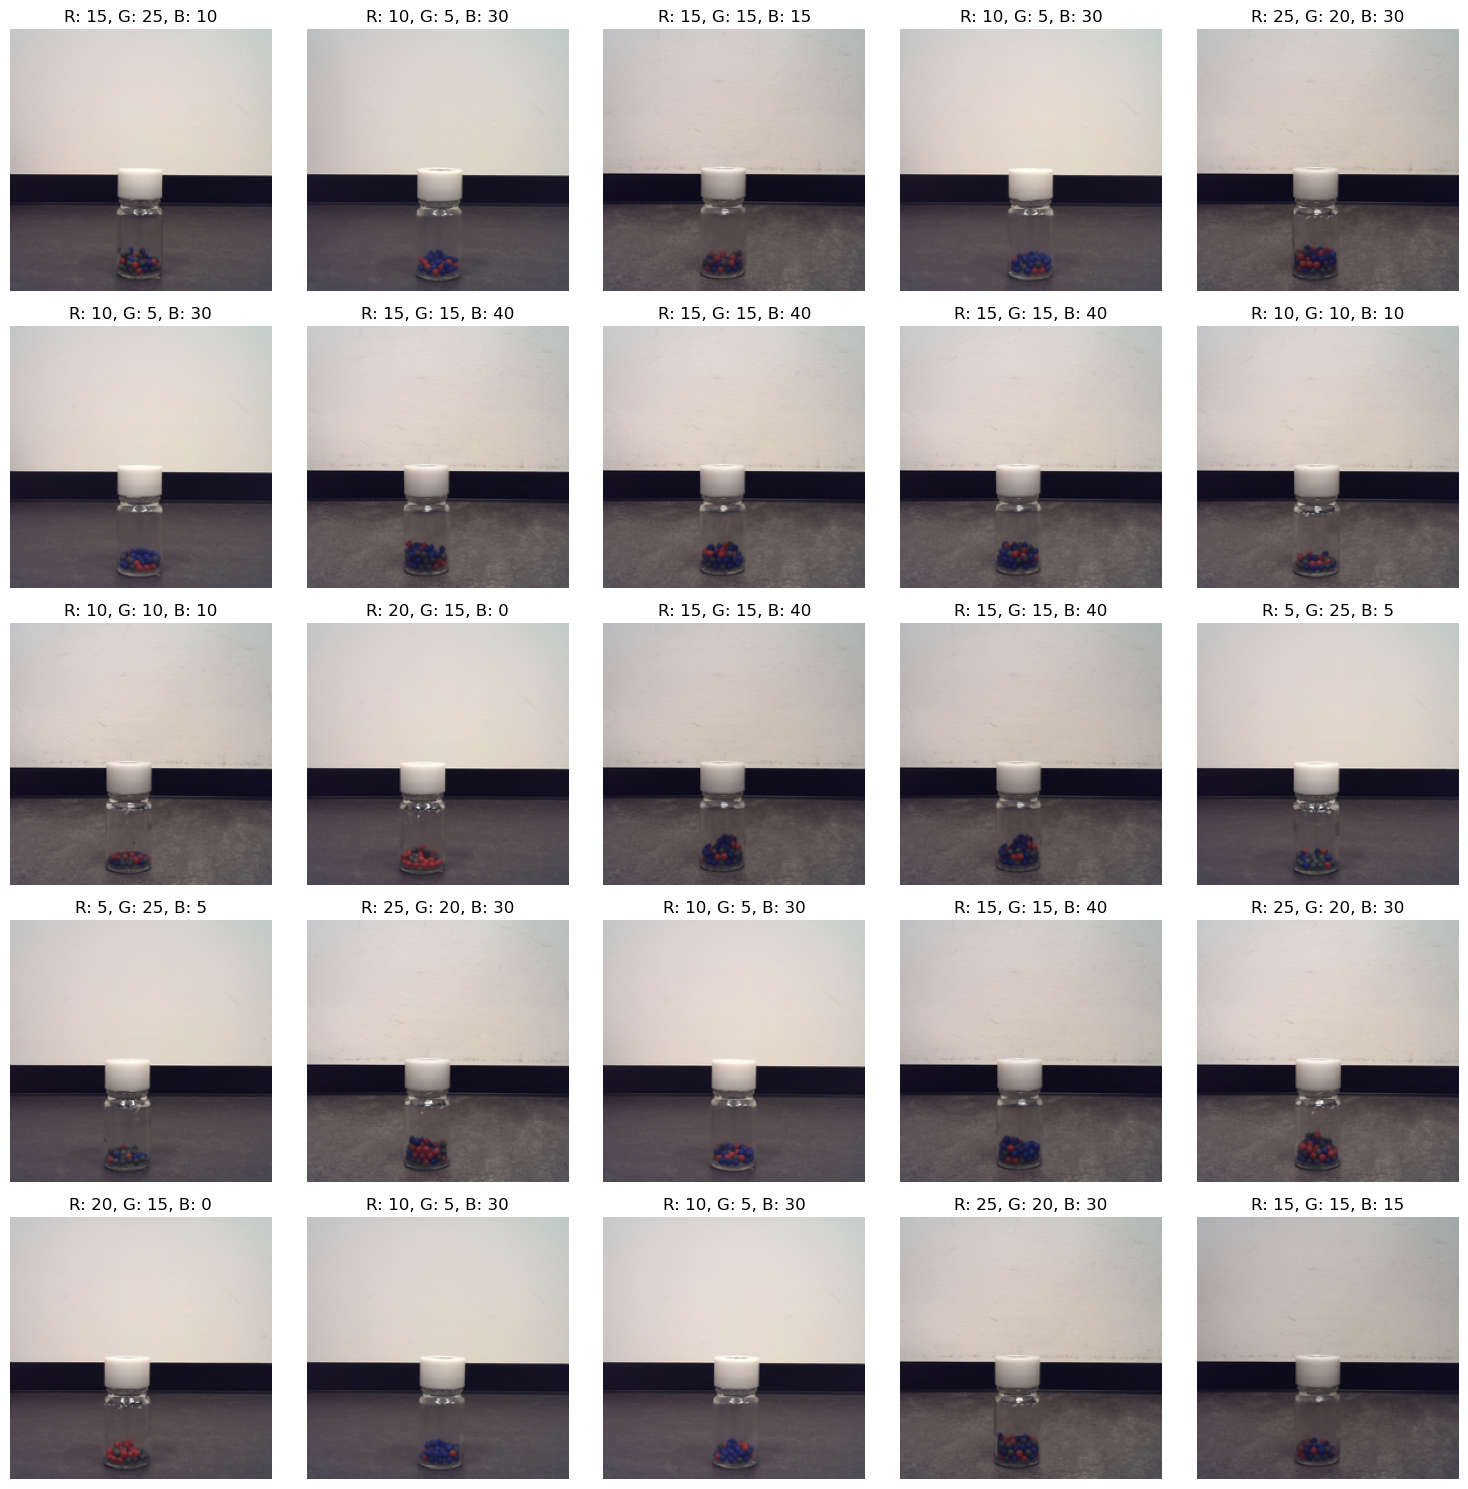

In [4]:
# Create a 5x5 grid of subplots
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

# Flatten the axes for easier iteration
axs = axs.flatten()

# Plot the first 25 images and their labels
for idx, (image, label) in enumerate(zip(images[:25], labels[:25])):
    axs[idx].imshow(image)
    axs[idx].set_title(f"R: {label[0]}, G: {label[1]}, B: {label[2]}")
    axs[idx].axis("off")  # Remove axes for clarity

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

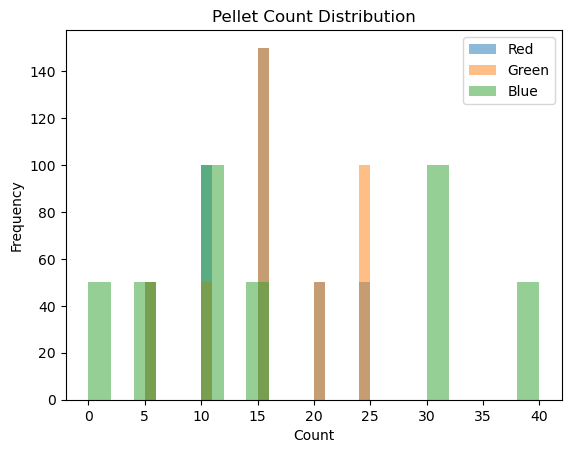

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `labels` is a numpy array of shape (N, 3) with [red, green, blue] counts
red_counts = labels[:, 0]
green_counts = labels[:, 1]
blue_counts = labels[:, 2]

# Plot histograms
plt.hist(red_counts, bins=20, alpha=0.5, label='Red')
plt.hist(green_counts, bins=20, alpha=0.5, label='Green')
plt.hist(blue_counts, bins=20, alpha=0.5, label='Blue')
plt.legend()
plt.title('Pellet Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [8]:
df = pd.DataFrame(labels)
df.describe()

,0,1,2
count,400.000000,400.000000,400.000000
mean,14.375000,16.250000,17.500000
std,5.836913,6.503325,13.245324
min,5.000000,5.000000,0.000000
25%,10.000000,13.750000,8.750000
50%,15.000000,15.000000,12.500000
75%,16.250000,21.250000,30.000000
max,25.000000,25.000000,40.000000
